# Metody Monte Carlo

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import Circle, Rectangle
from IPython.display import Image
import pandas as pd

## Estymacja π Metodą Monte Carlo

Wyprowadzenie: 

$$\text{Pole ćwiartki koła = } \frac{1}{4} \times \pi \times r^2 $$
$$\text{Pole kwadratu = } r^2 $$

$$\pi = 4 \times \frac{\text{pole ćwiartki koła}}{\text{pole kwadratu}}$$

Zastosujemy metodę Monte Carlo do estymacji wartości liczby π. Losowo umieszczając punkty wewnątrz kwadratu i licząc, ile z nich wpada do ćwiartki koła, możemy oszacować π za pomocą wzoru:

$$\pi \approx 4 \times \frac{\text{punkty wewnątrz koła}}{\text{wszystkie punkty}}$$

In [86]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate random points in the unit square
total_points = 100000
points_x = np.random.random(total_points)
points_y = np.random.random(total_points)

# Calculate which points fall inside the quarter circle
distances = points_x**2 + points_y**2
in_circle = distances <= 1

# Create a function to set up the plotting area
def setup_plot(fig, ax):
    # Clear the axis
    ax.clear()
    
    # Set the title and axis labels
    ax.set_title('Estymacja π Metodą Monte Carlo', fontsize=15)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    
    # Draw the unit square
    square = Rectangle((0, 0), 1, 1, fill=False, edgecolor='blue', linewidth=2)
    ax.add_patch(square)
    
    # Draw the quarter circle
    circle = Circle((0, 0), 1, fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(circle)
    
    # Set aspect ratio to equal for proper circle visualization
    ax.set_aspect('equal')
    
    # Add gridlines for better visualization
    ax.grid(True, linestyle='--', alpha=0.7)
    
    return square, circle

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 8))
fig.subplots_adjust(bottom=0.15)  # Make room for text at the bottom

# Setup base elements
square, circle = setup_plot(fig, ax)

# Initialize plots for red and blue points
inside_points, = ax.plot([], [], 'ro', markersize=4, label='Punkty wewnątrz koła')
outside_points, = ax.plot([], [], 'bo', markersize=4, label='Punkty na zewnątrz koła')

# Text elements for displaying statistics
stats_text = ax.text(0.5, -0.15, '', ha='center', va='center', transform=ax.transAxes, fontsize=12)

# Set point batches for animation
batch_size = 1000
num_frames = total_points // batch_size + (1 if total_points % batch_size else 0)

# Add pause frames (10 frames at 10 fps = 1 second pause)
pause_frames = 50
total_frames = num_frames + pause_frames

# Animation update function
def update(frame):
    # Check if we're in the pause period at the end
    if frame >= num_frames:
        # During pause, keep showing the final state
        current_points = total_points
    else:
        # Normal animation progression
        current_points = min((frame + 1) * batch_size, total_points)
    
    # Get points up to the current frame
    current_x = points_x[:current_points]
    current_y = points_y[:current_points]
    current_in_circle = in_circle[:current_points]
    
    # Separate inside and outside points
    inside_x = current_x[current_in_circle]
    inside_y = current_y[current_in_circle]
    outside_x = current_x[~current_in_circle]
    outside_y = current_y[~current_in_circle]
    
    # Update the plot data
    inside_points.set_data(inside_x, inside_y)
    outside_points.set_data(outside_x, outside_y)
    
    # Calculate current π estimate
    current_inside_count = len(inside_x)
    pi_estimate = 4 * current_inside_count / current_points
    
    # Add a "final result" indicator during the pause
    if frame >= num_frames:
        message = f'Punkty wewnątrz koła: {current_inside_count}\n'
        message += f'Wszystkich punktów: {current_points}\n'
        message += f'KOŃCOWA estymacja π: {pi_estimate:.6f} (Prawdziwa wartość: 3.141593...)'
    else:
        message = f'Punkty wewnątrz koła: {current_inside_count}\n'
        message += f'Wszystkich punktów: {current_points}\n'
        message += f'Estymacja π: {pi_estimate:.6f} (Prawdziwa wartość: 3.141593...)'
    
    stats_text.set_text(message)
    
    # Return all updated elements
    return inside_points, outside_points, stats_text

# Create the animation with pause frames added
ani = animation.FuncAnimation(fig, update, frames=total_frames, interval=100,
                             blit=True, repeat=False)

# Add a legend
ax.legend(loc='upper right')

# Save animation as GIF
gif_path = 'monte_carlo_pi.gif'
ani.save(gif_path, writer='pillow', fps=10, dpi=100)

# Display the final result
plt.close()  # Close the figure to avoid displaying it in the notebook

In [87]:
Image(url=gif_path)

## Końcowa Estymacja π

Obliczmy końcową estymację π wykorzystując wszystkie punkty:

In [88]:
# Final calculation with all points
final_inside = np.sum(in_circle)
final_pi = 4 * final_inside / total_points

print(f"Punkty wewnątrz koła: {final_inside}")
print(f"Wszystkich punktów: {total_points}")
print(f"Końcowa estymacja π: {final_pi:.6f}")
print(f"Prawdziwa wartość π: {np.pi:.6f}")
print(f"Błąd: {abs(final_pi - np.pi):.6f}")

Punkty wewnątrz koła: 78440
Wszystkich punktów: 100000
Końcowa estymacja π: 3.137600
Prawdziwa wartość π: 3.141593
Błąd: 0.003993


## Zwiększanie Precyzji

Zobaczmy, jak precyzja estymacji poprawia się wraz ze zwiększaniem liczby punktów:

,Liczba punktów,Estymacja π,Błąd
0,10,3.200000,0.058407
1,100,3.080000,0.061593
2,1000,3.120000,0.021593
3,10000,3.164400,0.022807
4,100000,3.146920,0.005327
5,1000000,3.141864,0.000271


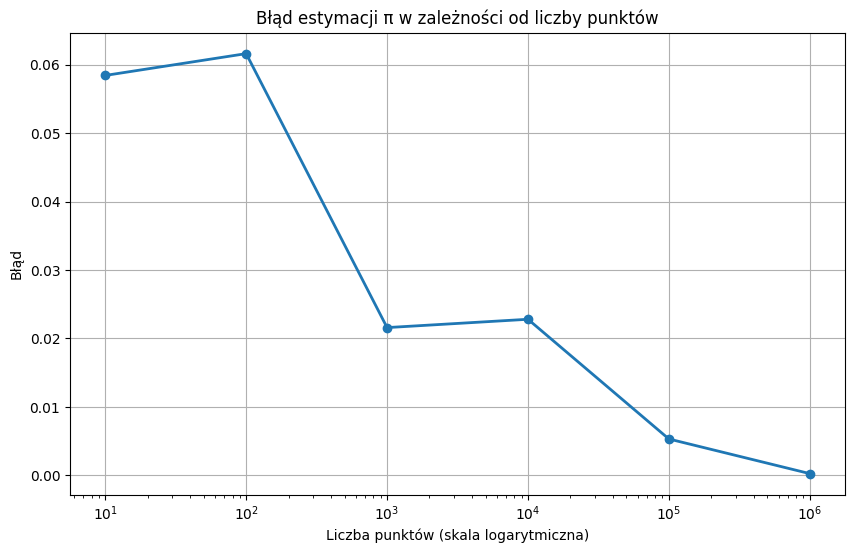

In [89]:
# Test with different numbers of points
point_ranges = [10, 100, 1000, 10000, 100000, 1000000]
results = []

# Set random seed again for reproducibility
np.random.seed(42)

# Generate a large number of points
max_points = max(point_ranges)
all_points_x = np.random.random(max_points)
all_points_y = np.random.random(max_points)
all_distances = all_points_x**2 + all_points_y**2
all_in_circle = all_distances <= 1


# Calculate pi estimates for different amounts of points
for n in point_ranges:
    points_in_circle = np.sum(all_in_circle[:n])
    pi_estimate = 4 * points_in_circle / n
    error = abs(pi_estimate - np.pi)
    results.append((n, pi_estimate, error))

# Create a DataFrame to display results
df_results = pd.DataFrame(results, columns=["Liczba punktów", "Estymacja π", "Błąd"])
df_results["Estymacja π"] = df_results["Estymacja π"].round(6)
df_results["Błąd"] = df_results["Błąd"].round(6)
display(df_results)

# Plot error convergence
plt.figure(figsize=(10, 6))
plt.plot([r[0] for r in results], [r[2] for r in results], 'o-', linewidth=2)
plt.xscale('log')
plt.xlabel('Liczba punktów (skala logarytmiczna)')
plt.ylabel('Błąd')
plt.title('Błąd estymacji π w zależności od liczby punktów')
plt.grid(True)
plt.show()

## Rozkład Estymacji π dla Różnych Rozmiarów Próbek

Wykonajmy wiele symulacji dla każdego rozmiaru próbki, aby zobaczyć rozkład estymacji π:

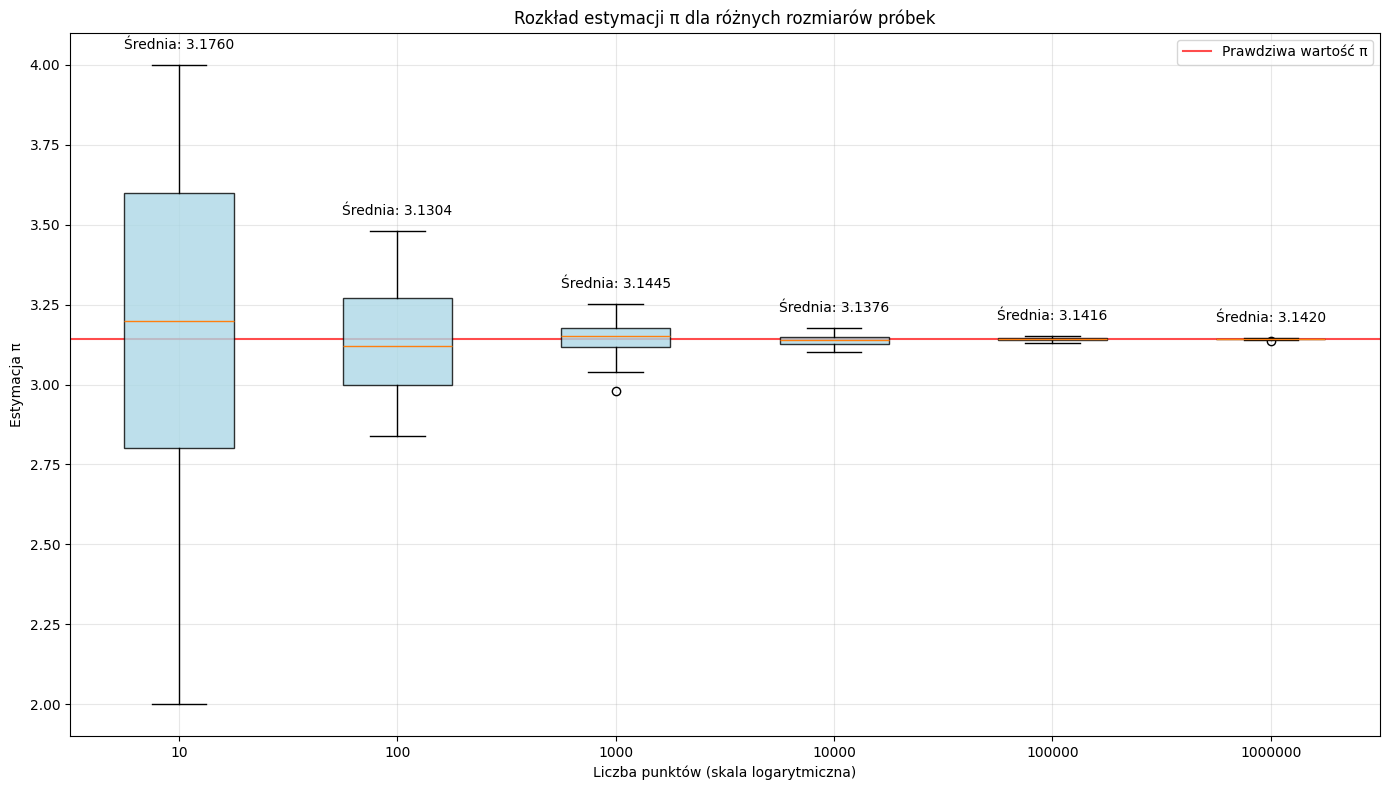

In [90]:
# Number of simulations for each point range
num_simulations = 50

# Prepare data structure for boxplot
boxplot_data = []
boxplot_labels = []

# For each point range, run multiple simulations
for n in point_ranges:
    estimates = []
    boxplot_labels.append(f"{n}")
    
    for sim in range(num_simulations):
        # Generate random points for each simulation
        sim_x = np.random.random(n)
        sim_y = np.random.random(n)
        sim_inside = np.sum((sim_x**2 + sim_y**2) <= 1)
        sim_pi = 4 * sim_inside / n
        estimates.append(sim_pi)
    
    boxplot_data.append(estimates)

# Create boxplot
plt.figure(figsize=(14, 8))

# Add a horizontal line for the true value of π
plt.axhline(y=np.pi, color='r', linestyle='-', alpha=0.7, label='Prawdziwa wartość π')

# Create the boxplot
bp = plt.boxplot(boxplot_data, tick_labels=boxplot_labels, patch_artist=True)

# Customize boxplot colors
for box in bp['boxes']:
    box.set(facecolor='lightblue', alpha=0.8)

plt.xlabel('Liczba punktów (skala logarytmiczna)')
plt.ylabel('Estymacja π')
plt.title('Rozkład estymacji π dla różnych rozmiarów próbek')
plt.grid(True, alpha=0.3)
plt.legend()

# Add mean values as text above each boxplot
for i, data in enumerate(boxplot_data):
    mean_val = np.mean(data)
    plt.text(i+1, max(data)+0.05, f'Średnia: {mean_val:.4f}', ha='center')

plt.tight_layout()
plt.show()

## Statystyczna Analiza Zbieżności

Przeanalizujmy statystyki naszych estymacji π:

,Liczba punktów,Średnia,Mediana,Odch. stand.,Min,Max,Błąd średniej
0,10,3.176000,3.200000,0.550839,2.000000,4.000000,0.034407
1,100,3.130400,3.120000,0.166625,2.840000,3.480000,0.011193
2,1000,3.144480,3.152000,0.053783,2.980000,3.252000,0.002887
3,10000,3.137592,3.137800,0.017354,3.102400,3.177600,0.004001
4,100000,3.141570,3.141740,0.005089,3.130920,3.153120,0.000022
5,1000000,3.141980,3.141926,0.001908,3.137116,3.146164,0.000387


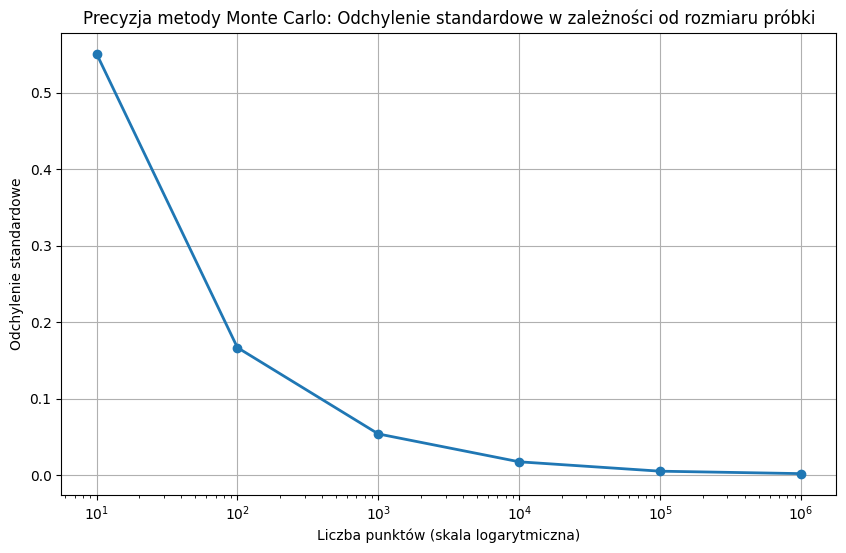

In [91]:
# Calculate statistics for each point range
stats_data = []

for i, n in enumerate(point_ranges):
    data = boxplot_data[i]
    mean = np.mean(data)
    median = np.median(data)
    std_dev = np.std(data)
    min_val = np.min(data)
    max_val = np.max(data)
    mean_error = abs(mean - np.pi)
    
    stats_data.append([n, mean, median, std_dev, min_val, max_val, mean_error])

# Create a DataFrame with the statistics
stats_df = pd.DataFrame(stats_data, columns=["Liczba punktów", "Średnia", "Mediana", "Odch. stand.", "Min", "Max", "Błąd średniej"])
# Round to 6 decimal places for display
stats_df = stats_df.round(6)
display(stats_df)

# Plot standard deviation vs number of points (showing convergence rate)
plt.figure(figsize=(10, 6))
plt.plot([row[0] for row in stats_data], [row[3] for row in stats_data], 'o-', linewidth=2)
plt.xscale('log')
plt.xlabel('Liczba punktów (skala logarytmiczna)')
plt.ylabel('Odchylenie standardowe')
plt.title('Precyzja metody Monte Carlo: Odchylenie standardowe w zależności od rozmiaru próbki')
plt.grid(True)
plt.show()

## Porównanie z Innymi Metodami Estymacji π

Porównajmy metodę Monte Carlo z innymi popularnymi metodami estymacji π:

1. **Metody oparte na szeregach**: Szereg Leibniza, formuła Bailey-Borwein-Plouffe, itp.
2. **Całkowanie numeryczne**: Metoda trapezów

Poniżej przedstawiamy wzory matematyczne dla każdej z metod:

### Metoda Monte Carlo
$$\pi \approx 4 \cdot \frac{\text{liczba punktów wewnątrz koła}}{\text{całkowita liczba punktów}}$$

### Szereg Leibniza
$$\pi = 4 \cdot \sum_{n=0}^{\infty} \frac{(-1)^n}{2n+1} = 4 \cdot (1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + ...)$$

### Formuła Bailey-Borwein-Plouffe (BBP)
$$\pi = \sum_{k=0}^{\infty} \frac{1}{16^k} \left( \frac{4}{8k+1} - \frac{2}{8k+4} - \frac{1}{8k+5} - \frac{1}{8k+6} \right)$$

### Całkowanie Numeryczne
$$\pi = 4 \cdot \int_0^1 \sqrt{1-x^2} \, dx$$

Zaimplementujemy te metody i porównamy ich zbieżność.

In [92]:
# Define different pi estimation methods
def monte_carlo_pi(n):
    """Estymacja pi metodą Monte Carlo"""
    x = np.random.random(n)
    y = np.random.random(n)
    inside = np.sum((x**2 + y**2) <= 1)
    return 4 * inside / n

def leibniz_pi(n):
    """Estymacja pi przy użyciu szeregu Leibniza: π/4 = 1 - 1/3 + 1/5 - 1/7 + ..."""
    terms = np.arange(n)
    series = np.zeros(n)
    for i in range(n):
        series[i] = (-1)**i / (2*i + 1)
    return 4 * np.cumsum(series)

def bbp_pi(n):
    """Estymacja pi przy użyciu uproszczonej formuły Bailey-Borwein-Plouffe"""
    result = np.zeros(n)
    for i in range(1, n+1):
        k = i - 1
        term = 1/16**k * (4/(8*k + 1) - 2/(8*k + 4) - 1/(8*k + 5) - 1/(8*k + 6))
        result[i-1] = term
    return np.cumsum(result)

def numerical_integration_pi(n):
    """Estymacja pi przez całkowanie numeryczne ćwiartki koła"""
    x = np.linspace(0, 1, n+1)
    y = np.sqrt(1 - x**2)
    # Metoda trapezów
    areas = np.zeros(n)
    for i in range(1, n+1):
        # Use first i+1 points for integration
        xi = x[:i+1]
        yi = y[:i+1]
        # Metoda trapezów
        areas[i-1] = np.trapezoid(yi, xi) * 4
    return areas

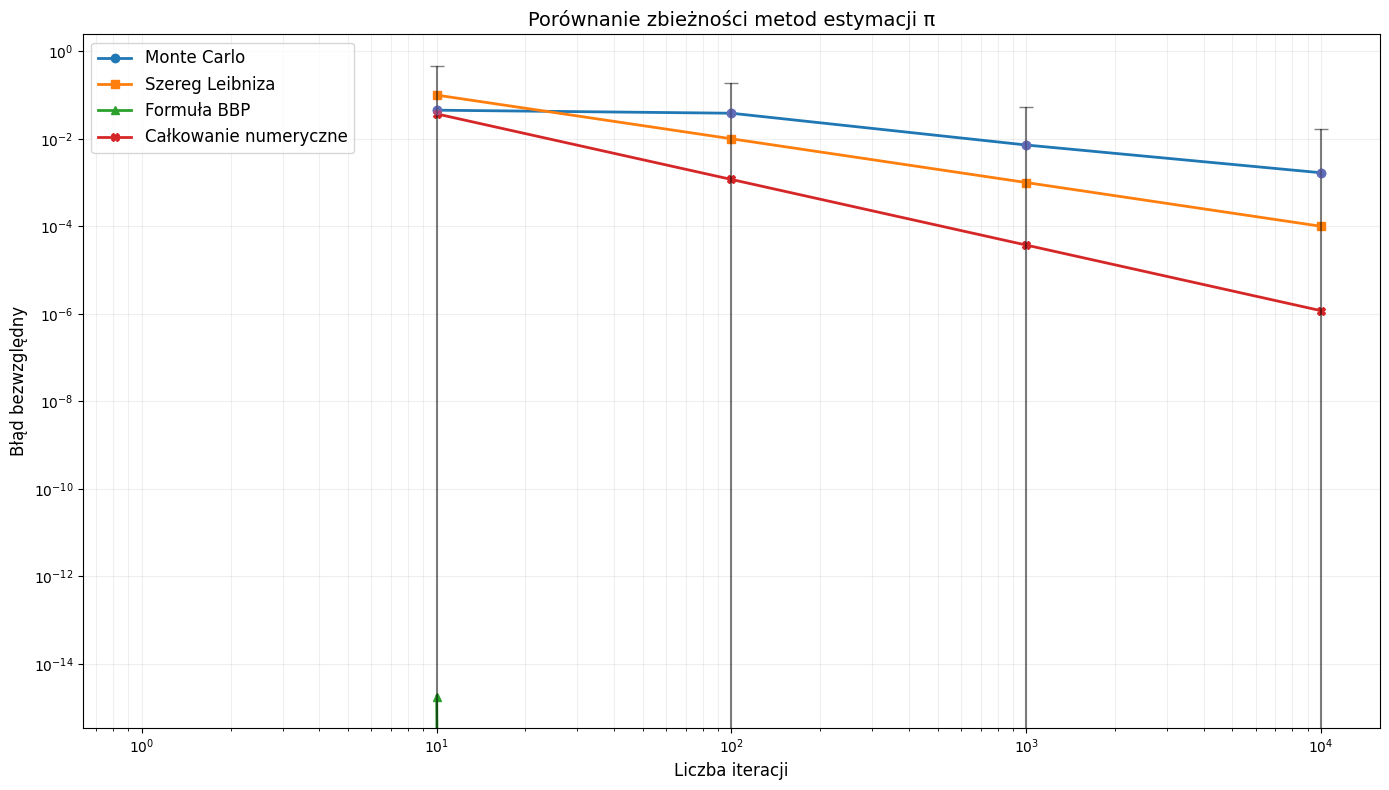

,Metoda,Estymacja (n=10000),Błąd bezwzględny,Tempo zbieżności
0,Monte Carlo,3.1399200000 ± 0.0150941578,0.0016726536,O(1/√n) (probabilistyczne)
1,Szereg Leibniza,3.1414926536,0.0001000000,O(1/n) (bardzo wolne)
2,Formuła BBP,3.1415926536,0.0000000000,O(16^-n) (wykładnicze)
3,Całkowanie numeryczne,3.1415914776,0.0000011760,O(1/n²) (kwadratowe)


In [93]:
# Compare convergence rates
iterations = [10, 100, 1000, 10000]

# Set up figure for comparing methods
plt.figure(figsize=(14, 8))

# Run multiple Monte Carlo simulations for each iteration count
mc_means = []
mc_stds = []
mc_trials = 30

for n in iterations:
    # Use int(n) to ensure n is treated as an integer to avoid overflow
    mc_results = [monte_carlo_pi(int(n)) for _ in range(mc_trials)]
    mc_means.append(np.mean(mc_results))
    mc_stds.append(np.std(mc_results))

# Calculate other methods
leibniz_results = [leibniz_pi(n)[-1] for n in iterations]
bbp_results = [bbp_pi(n)[-1] for n in iterations]
integration_results = [numerical_integration_pi(n)[-1] for n in iterations]

# Calculate errors
mc_errors = np.abs(np.array(mc_means) - np.pi)
leibniz_errors = np.abs(np.array(leibniz_results) - np.pi)
bbp_errors = np.abs(np.array(bbp_results) - np.pi)
integration_errors = np.abs(np.array(integration_results) - np.pi)

# Plot convergence rates (log scale)
plt.loglog(iterations, mc_errors, 'o-', label='Monte Carlo', linewidth=2)
plt.loglog(iterations, leibniz_errors, 's-', label='Szereg Leibniza', linewidth=2)
plt.loglog(iterations, bbp_errors, '^-', label='Formuła BBP', linewidth=2)
plt.loglog(iterations, integration_errors, 'X-', label='Całkowanie numeryczne', linewidth=2)

# Add error bars for Monte Carlo to show variance
plt.errorbar(iterations, mc_errors, yerr=mc_stds, fmt='o', capsize=5, ecolor='black', alpha=0.5)

plt.xlabel('Liczba iteracji', fontsize=12)
plt.ylabel('Błąd bezwzględny', fontsize=12)
plt.title('Porównanie zbieżności metod estymacji π', fontsize=14)
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Create a more comprehensive comparison table
method_names = ['Monte Carlo', 'Szereg Leibniza', 'Formuła BBP', 'Całkowanie numeryczne']
convergence_rates = ['O(1/√n)  (probabilistyczne)', 'O(1/n)   (bardzo wolne)', 'O(16^-n) (wykładnicze)', 'O(1/n²)  (kwadratowe)']

# Format results for the table
n_for_comparison = 10000  # Use n=10000 for the comparison
mc_formatted = f"{mc_means[3]:.10f} ± {mc_stds[3]:.10f}"
leibniz_formatted = f"{leibniz_results[3]:.10f}"
bbp_formatted = f"{bbp_results[3]:.10f}"
integration_formatted = f"{integration_results[3]:.10f}"

# Format errors
mc_error_formatted = f"{mc_errors[3]:.10f}"
leibniz_error_formatted = f"{leibniz_errors[3]:.10f}"
bbp_error_formatted = f"{bbp_errors[3]:.10f}"
integration_error_formatted = f"{integration_errors[3]:.10f}"

# Create DataFrame for comparison
comparison_data = {
    'Metoda': method_names,
    'Estymacja (n=10000)': [mc_formatted, leibniz_formatted, bbp_formatted, integration_formatted],
    'Błąd bezwzględny': [mc_error_formatted, leibniz_error_formatted, bbp_error_formatted, integration_error_formatted],
    'Tempo zbieżności': convergence_rates,
}

comparison_df = pd.DataFrame(comparison_data)
display(comparison_df)

## Szczegółowe Porównanie Metod Estymacji

Przeanalizujmy wyniki różnych metod estymacji π i porównajmy ich właściwości:

In [94]:
# Calculate estimates for a fixed number of iterations
fixed_n = 10000

# Run multiple Monte Carlo simulations
mc_trials = 30
mc_estimates = [monte_carlo_pi(fixed_n) for _ in range(mc_trials)]
mc_mean = np.mean(mc_estimates)
mc_std = np.std(mc_estimates)

# Calculate other methods
leibniz_estimate = leibniz_pi(fixed_n)[-1]
bbp_estimate = bbp_pi(min(1000, fixed_n))[-1]  # BBP converges very quickly
integration_estimate = numerical_integration_pi(fixed_n)[-1]

# Calculate errors
mc_error = abs(mc_mean - np.pi)
leibniz_error = abs(leibniz_estimate - np.pi)
bbp_error = abs(bbp_estimate - np.pi)
integration_error = abs(integration_estimate - np.pi)

# Store results in variables for the markdown cell below
mc_result = f"{mc_mean:.10f} ± {mc_std:.10f} (błąd: {mc_error:.10f})"
leibniz_result = f"{leibniz_estimate:.10f} (błąd: {leibniz_error:.10f})"
bbp_result = f"{bbp_estimate:.10f} (błąd: {bbp_error:.10f})"
integration_result = f"{integration_estimate:.10f} (błąd: {integration_error:.10f})"

### Wyniki estymacji π dla n=10000

#### 1. Metoda Monte Carlo
- **Estymacja:** 

- **Tempo zbieżności:** O(1/√n) (probabilistyczne)
- **Zalety:** Prosta implementacja, łatwe zrównoleglenie, naturalna wizualizacja
- **Wady:** Wolna zbieżność, wyniki różnią się między uruchomieniami
- **Zastosowania:** Problemy wielowymiarowe, symulacje probabilistyczne, wizualizacje edukacyjne

#### 2. Szereg Leibniza
- **Estymacja:** 

- **Tempo zbieżności:** O(1/n) (bardzo wolne)
- **Wzór:** $\pi = 4 \cdot (1 - \frac{1}{3} + \frac{1}{5} - \frac{1}{7} + ...)$
- **Zalety:** Prosty szereg, łatwy do zrozumienia i implementacji
- **Wady:** Bardzo wolna zbieżność, wymaga wielu wyrazów dla dobrej dokładności

#### 3. Formuła BBP (Bailey-Borwein-Plouffe)
- **Estymacja:** 

- **Tempo zbieżności:** O(16^-n) (wykładnicze)
- **Zalety:** Ekstremalnie szybka zbieżność, możliwość obliczenia konkretnych cyfr π
- **Wady:** Złożona formuła, trudniejsza do zrozumienia
- **Ciekawostka:** Ta formuła pozwala obliczać n-tą cyfrę π w systemie szesnastkowym bez znajomości poprzednich cyfr

#### 4. Całkowanie numeryczne
- **Estymacja:** 

- **Tempo zbieżności:** O(1/n²) (kwadratowe)
- **Wzór:** $\pi = 4 \cdot \int_0^1 \sqrt{1-x^2} \, dx$
- **Zalety:** Lepsza zbieżność niż Monte Carlo, spójne wyniki
- **Wady:** Bardziej złożona implementacja niż Monte Carlo

### Podsumowanie porównania

Najdokładniejsze metody (dla n=10000):
1. Formuła BBP - praktycznie zerowy błąd
2. Całkowanie numeryczne - błąd rzędu 10⁻⁶
3. Szereg Leibniza - błąd rzędu 10⁻⁴
4. Monte Carlo - błąd rzędu 10⁻³

Metoda Monte Carlo, choć najmniej dokładna, ma unikalne zalety edukacyjne i wizualizacyjne oraz jest naturalnie równoległa, co czyni ją użyteczną w wielu zastosowaniach.

<Figure size 1500x1000 with 0 Axes>

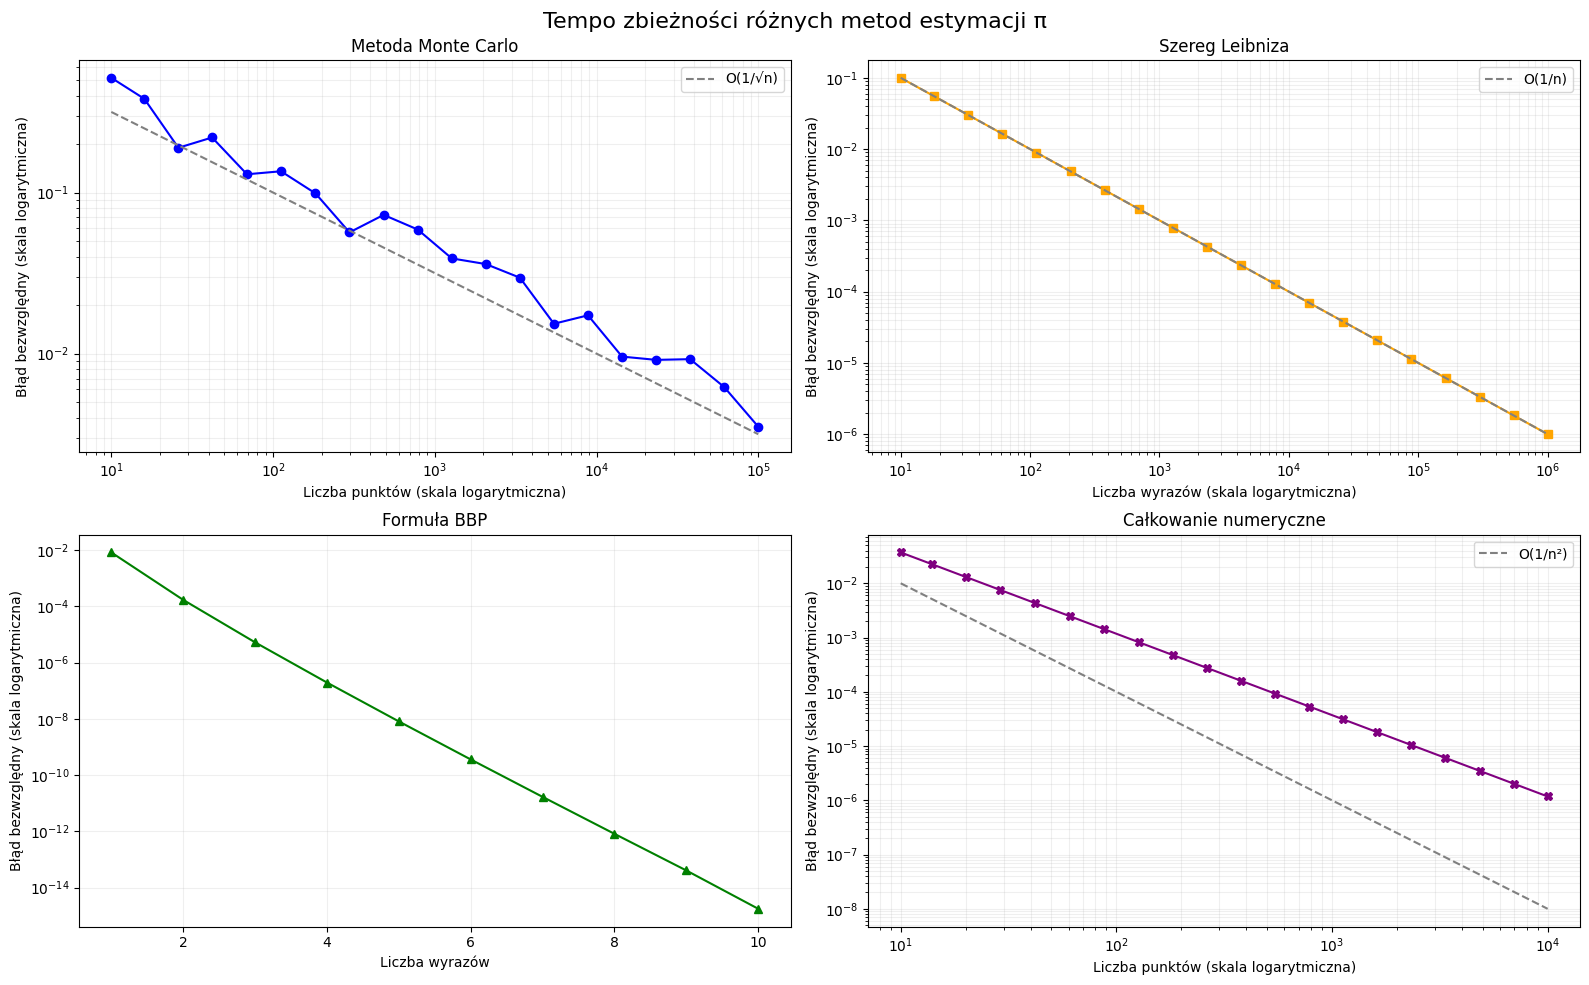

In [95]:
# Plot convergence for all methods
plt.figure(figsize=(15, 10))

# For visualization, we'll use different ranges for different methods
n_monte_carlo = np.logspace(1, 5, 20, dtype=int)
n_leibniz = np.logspace(1, 6, 20, dtype=int)  # Needs more iterations
n_bbp = np.arange(1, 11)  # Converges very quickly
n_integration = np.logspace(1, 4, 20, dtype=int)

# Calculate errors for each method
mc_errors_detailed = []
for n in n_monte_carlo:
    estimates = [monte_carlo_pi(n) for _ in range(10)]  # 10 trials per n
    mc_errors_detailed.append(np.mean([abs(est - np.pi) for est in estimates]))

leibniz_errors_detailed = [abs(leibniz_pi(n)[-1] - np.pi) for n in n_leibniz]
bbp_errors_detailed = [abs(bbp_pi(n)[-1] - np.pi) for n in n_bbp]
integration_errors_detailed = [abs(numerical_integration_pi(n)[-1] - np.pi) for n in n_integration]

# Create subplot for each method
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.flatten()

# Plot each method
axs[0].loglog(n_monte_carlo, mc_errors_detailed, 'o-', color='blue')
axs[0].set_title('Metoda Monte Carlo')
axs[0].set_xlabel('Liczba punktów (skala logarytmiczna)')
axs[0].set_ylabel('Błąd bezwzględny (skala logarytmiczna)')
axs[0].grid(True, which="both", ls="-", alpha=0.2)

axs[1].loglog(n_leibniz, leibniz_errors_detailed, 's-', color='orange')
axs[1].set_title('Szereg Leibniza')
axs[1].set_xlabel('Liczba wyrazów (skala logarytmiczna)')
axs[1].set_ylabel('Błąd bezwzględny (skala logarytmiczna)')
axs[1].grid(True, which="both", ls="-", alpha=0.2)

axs[2].semilogy(n_bbp, bbp_errors_detailed, '^-', color='green')
axs[2].set_title('Formuła BBP')
axs[2].set_xlabel('Liczba wyrazów')
axs[2].set_ylabel('Błąd bezwzględny (skala logarytmiczna)')
axs[2].grid(True, which="both", ls="-", alpha=0.2)

axs[3].loglog(n_integration, integration_errors_detailed, 'X-', color='purple')
axs[3].set_title('Całkowanie numeryczne')
axs[3].set_xlabel('Liczba punktów (skala logarytmiczna)')
axs[3].set_ylabel('Błąd bezwzględny (skala logarytmiczna)')
axs[3].grid(True, which="both", ls="-", alpha=0.2)

# Add theoretical rates for comparison
x_mc = np.array(n_monte_carlo)
axs[0].loglog(x_mc, 1/np.sqrt(x_mc), '--', color='gray', label='O(1/√n)')
axs[0].legend()

x_leibniz = np.array(n_leibniz)
axs[1].loglog(x_leibniz, 1/x_leibniz, '--', color='gray', label='O(1/n)')
axs[1].legend()

x_integration = np.array(n_integration)
axs[3].loglog(x_integration, 1/x_integration**2, '--', color='gray', label='O(1/n²)')
axs[3].legend()

plt.tight_layout()
plt.suptitle('Tempo zbieżności różnych metod estymacji π', fontsize=16)
plt.subplots_adjust(top=0.93)
plt.show()

## Wnioski

Metoda Monte Carlo do estymacji π wykazuje następujące charakterystyki w porównaniu do innych metod:

1. **Tempo zbieżności**: Tempo zbieżności Monte Carlo O(1/√n) jest wolniejsze niż wielu metod deterministycznych, takich jak całkowanie numeryczne (O(1/n²)), i znacznie wolniejsze niż specjalistyczne algorytmy, takie jak BBP, które mają zbieżność wykładniczą.

2. **Zmienność**: Monte Carlo wprowadza losowość, co skutkuje różnymi estymacjami przy tych samych liczbach punktów w różnych uruchomieniach.

3. **Prostota**: Podejście Monte Carlo jest koncepcyjnie proste i łatwe w implementacji.

4. **Wizualizacja**: Metoda zapewnia interesującą wizualną reprezentację matematycznego związku między π a geometrią koła.

5. **Zrównoleglenie**: Metody Monte Carlo są naturalnie równoległe, co czyni je odpowiednimi do obliczeń rozproszonych.

Chociaż Monte Carlo nie jest najefektywniejszym sposobem obliczania π, demonstruje ważne koncepcje w metodach obliczeniowych i teorii prawdopodobieństwa. Do praktycznego obliczania π metody deterministyczne, takie jak BBP, oferują znacznie lepsze tempo zbieżności.

Według mnie wizualizacja tej metody aproksymacji liczby π jest bardzo fajnym sposobem na pokazaniem uczniom / studentom, że matematyka, prawdopodobieństwo i informatyka wcale nie są nudne :) 